# 0. EDA Process

**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

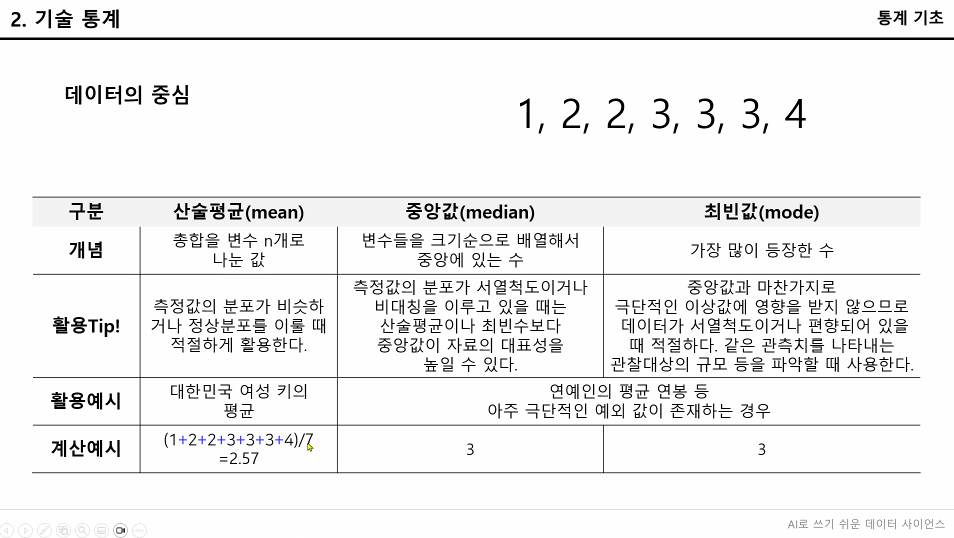

### 중심경향값 = 대표값
- 평균(mean)
- 중앙값(median)
- 최빈값(mode)

### 산포도
- 표준편차 (stddev)
- 분산 (variance)
- 범위 (range)
- 사분위 (quartitle)

### 분포도
- 왜도 (skewness)
- 첨도 (kurtosis)

# 항공사 지연요인 데이터 탐색적 분석
https://www.kaggle.com/datasets/pitterman/airline-stats  
kaggle : 데이터 분석 관련된, 대회 및 커뮤니티

carrier_delay : 항공사 요인  
atc_delay : ATC 항공 교통 관제 요인  
weather_delay : 날씨로 인한 지연 요인   
airline : 항공사

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/airline_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


## 1. 변수 탐색

범주형 변수 : airline  
수치형 변수 : carrier_delay, atc_delay, weather_delay 변수 및 퍼센트

###### 총 6개 항공사의 데이터를 포함하고 있는 것 확인

In [7]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [9]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 2. 수치형 변수의 통계량 확인

In [13]:
df.describe()
#결측치 확인 및 숫자 감 익히기

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


[항공사 요인]
- American이 평균 9.04%
- 표준편차가 가장 큰 항공사는 United로 5.36%



In [46]:
#항공사별 기술통계량 확인
for i in df.columns:
    print(f"요인 {i}")
    print(df.groupby('airline')[i].describe())
    print(f"{'*'*100}")



요인 pct_carrier_delay
            count      mean       std  min       25%       50%        75%  \
airline                                                                     
Alaska     3851.0  3.521889  2.483224  0.0  1.935484  3.225806   4.685599   
American   5723.0  9.042180  4.139067  0.0  6.338538  8.428571  10.988763   
Delta      9095.0  6.333460  4.695292  0.0  3.813989  5.548387   7.821952   
Jet Blue   3773.0  8.081843  3.797737  0.0  5.341176  7.657895  10.280000   
Southwest  5584.0  7.521997  3.345085  0.0  5.070294  6.960930   9.354839   
United     5414.0  7.398833  5.369283  0.0  4.034708  6.445210   9.633110   

                  max  
airline                
Alaska      22.290323  
American    50.000000  
Delta      100.000000  
Jet Blue    28.000000  
Southwest   24.800000  
United     100.000000  
****************************************************************************************************
요인 pct_atc_delay
            count      mean       std  min       25%

## 3. 결측치 개수 확인

In [53]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

## 4. 시각적 분석

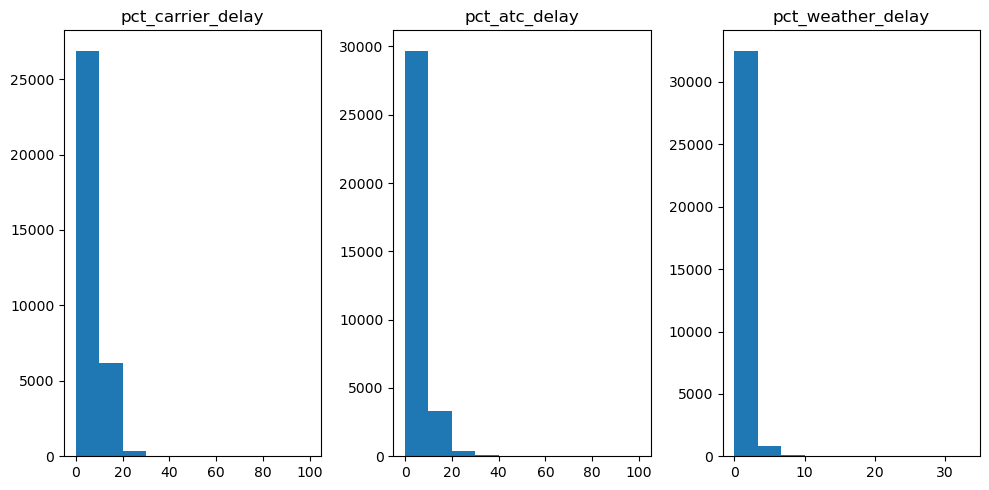

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


ax1.hist(df[df.columns[0]])
ax2.hist(df[df.columns[1]])
ax3.hist(df[df.columns[2]])

ax1.set_title(df.columns[0])
ax2.set_title(df.columns[1])
ax3.set_title(df.columns[2])

fig.tight_layout()
plt.show()

[항공사 지연 요인]  
첫번째 구간 : 12천  
두번째 구간 :15천  

[항공사 지연 요인]
첫번째 구간 : 29천  
두번째 구간 : 

지연 유형별 중앙값, 사분위수, 이상치를 확인함

[이상치]
1) 항공사 지연 : 20% 이상인 경우, 그런데 100에 육박하는 극단적인 지연율도 있음
2) ATC 지연 : 항공사 지연보다는 낮은 수준에서 이상치로 판단함, 역시 100인 극단적인 지연도 있으나,항공사 지연 요인보다 빈번하진 않다.
3) 날씨지연 : 중앙값, IQR(사분위수 범위) 자체가 작다. 이상치가 20이상인 경우이고, 빈번하진 않다.

<Axes: >

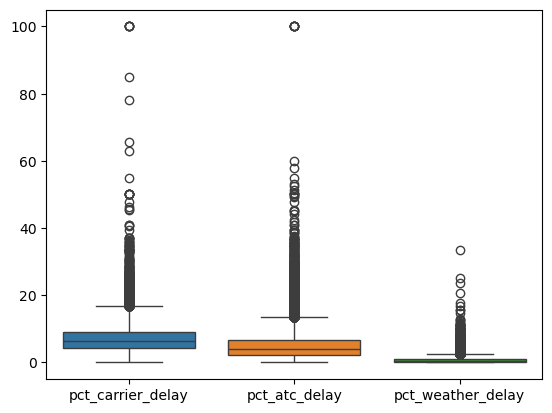

In [113]:
sns.boxplot(data = df)

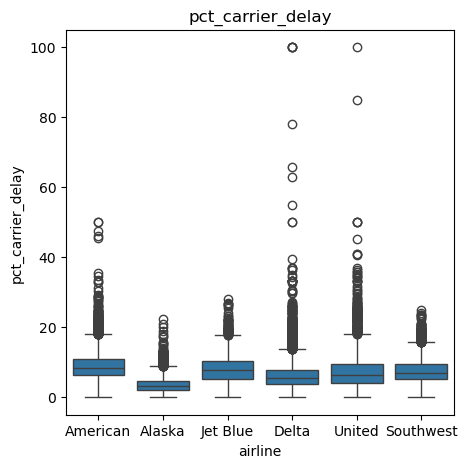

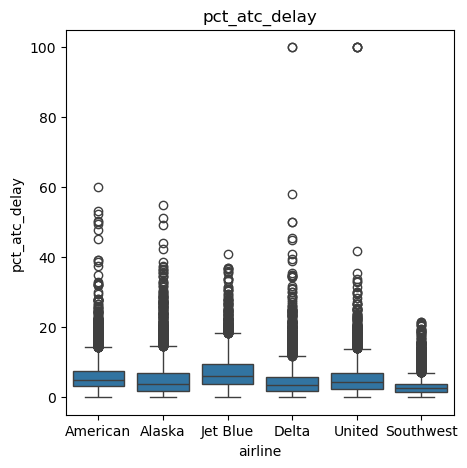

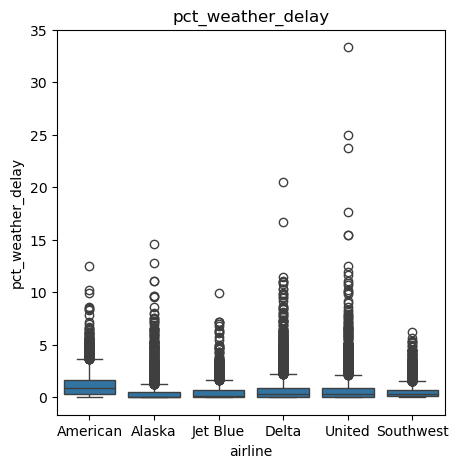

In [134]:
#항공사별로 상자 그림 - 항공사별 요인
plt.figure(figsize = (5,5))
sns.boxplot(x = 'airline', y = df.columns[0], data =df)
plt.title(df.columns[0])
plt.show()

plt.figure(figsize = (5,5))
sns.boxplot(x = 'airline', y = df.columns[1], data =df)
plt.title(df.columns[1])
plt.show()

plt.figure(figsize = (5,5))
sns.boxplot(x = 'airline', y = df.columns[2], data =df)
plt.title(df.columns[2])
plt.show()

##### 해석
##### [항공사 요인]
Delta, United 항고사가 중앙값은 다른 항공사에 비해 크지 않다.  
그러나 이상치가 많이 보인다.  
Alaska가 전반적으로 발생율이 낮은 편이다.


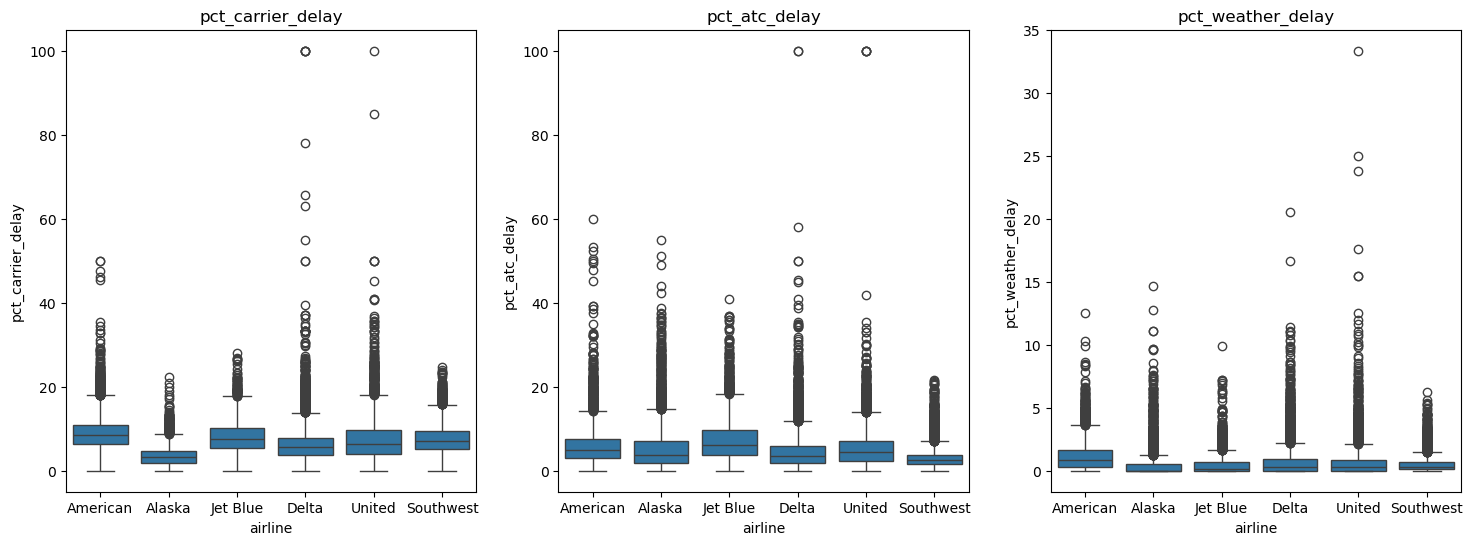

In [141]:
#GPT가 만들어줌
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 첫 번째 요인 박스플롯
sns.boxplot(x='airline', y=df.columns[0], data=df, ax=axes[0])
axes[0].set_title(df.columns[0])

# 두 번째 요인 박스플롯
sns.boxplot(x='airline', y=df.columns[1], data=df, ax=axes[1])
axes[1].set_title(df.columns[1])

# 세 번째 요인 박스플롯
sns.boxplot(x='airline', y=df.columns[2], data=df, ax=axes[2])
axes[2].set_title(df.columns[2])

plt.tight_layout == True  # 레이아웃 조정
plt.show()


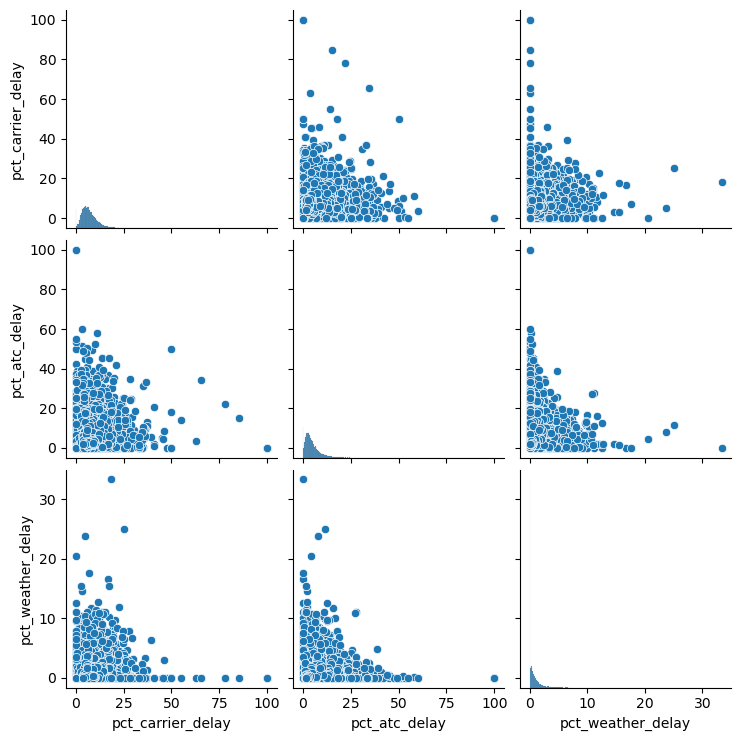

In [142]:
#산점도 확인
sns.pairplot(df)

In [153]:
cor_matrix = df.corr(numeric_only = True)
cor_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

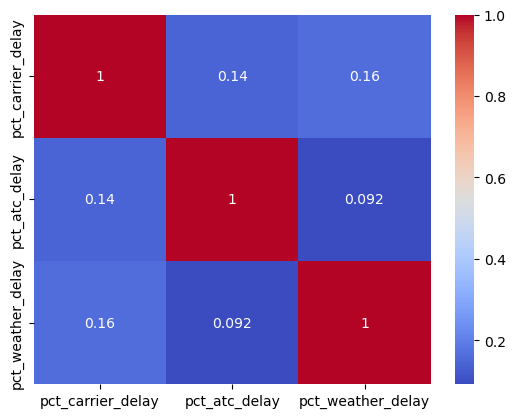

In [156]:
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm')

###### 해석
1. 항공사 요인 vs ATC 요인 간 상관계수가 0.14로, 약한 상관관계가 있음을 확인할 수 있다.
2. 항공사 요인 vs 날씨 요인 간 상관계수가 0.16으로, 역시 약한 상관관계가 있음을 확인했습니다. 이것은 항공사 지연이 발생했을때, 기상 지연도 발생할 수 있다는 것을 의미하지만, 상당부분 두 지연 요인은 독립적으로 발생하는 것으로 보입니다.
3. ATC 요인 vs 날씨 요인은 0.092로 거의 상관이 없다고 볼 수 있습니다. 서로 독립적으로 발생하는 경향이 있음을 의미합니다.

In [157]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

## 결측치를 제거하고 분석

In [162]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

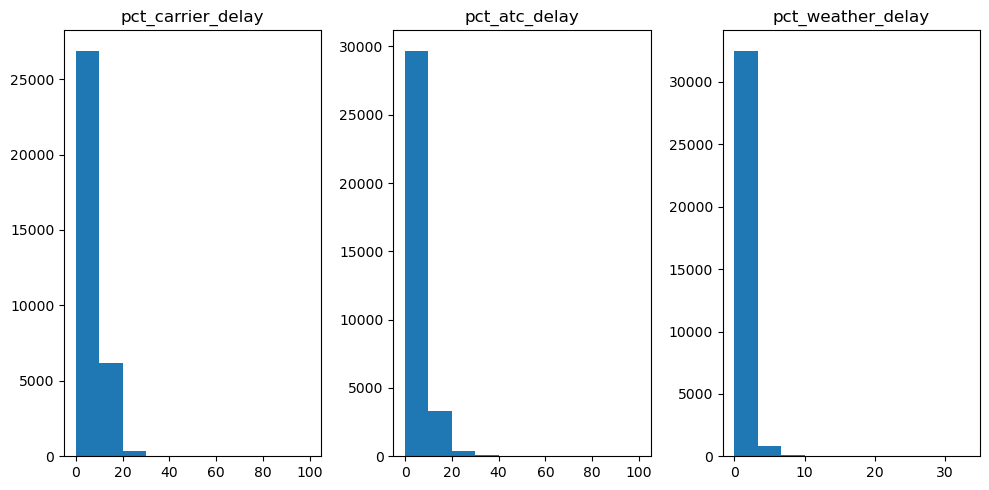

In [193]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_cleaned[df_cleaned.columns[0]])
ax2.hist(df_cleaned[df_cleaned.columns[1]])
ax3.hist(df_cleaned[df_cleaned.columns[2]])

ax1.set_title(df_cleaned.columns[0])
ax2.set_title(df_cleaned.columns[1])
ax3.set_title(df_cleaned.columns[2])

fig.tight_layout()
plt.show

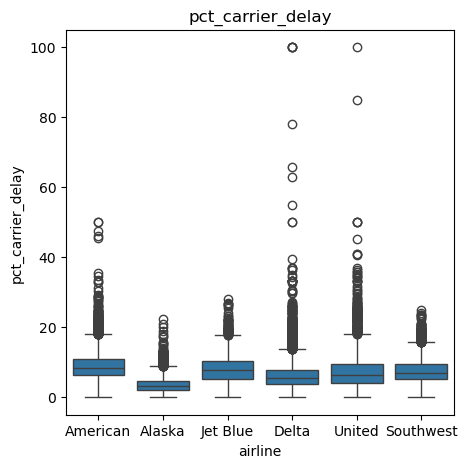

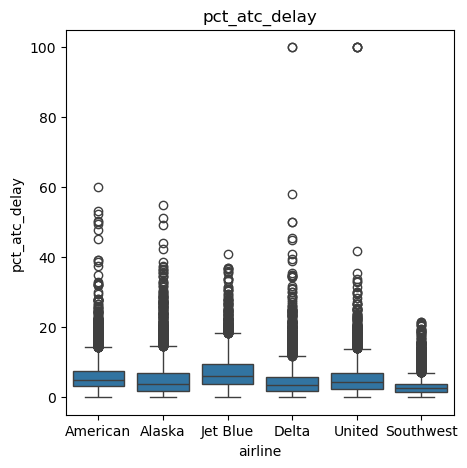

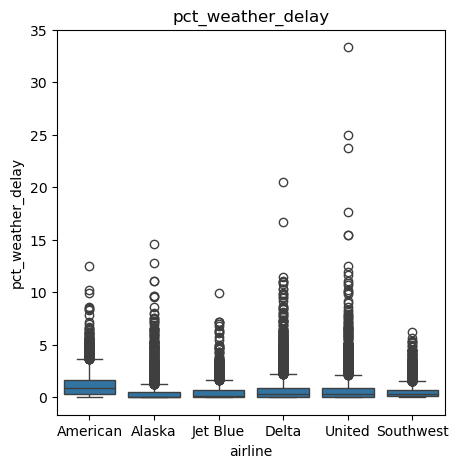

In [190]:
#항공사별로 상자 그림 - 항공사별 요인
plt.figure(figsize = (5,5))
sns.boxplot(x = 'airline', y = df.columns[0], data =df_cleaned)
plt.title(df.columns[0])
plt.show()

plt.figure(figsize = (5,5))
sns.boxplot(x = 'airline', y = df.columns[1], data =df_cleaned)
plt.title(df.columns[1])
plt.show()

plt.figure(figsize = (5,5))
sns.boxplot(x = 'airline', y = df.columns[2], data =df_cleaned)
plt.title(df.columns[2])
plt.show()

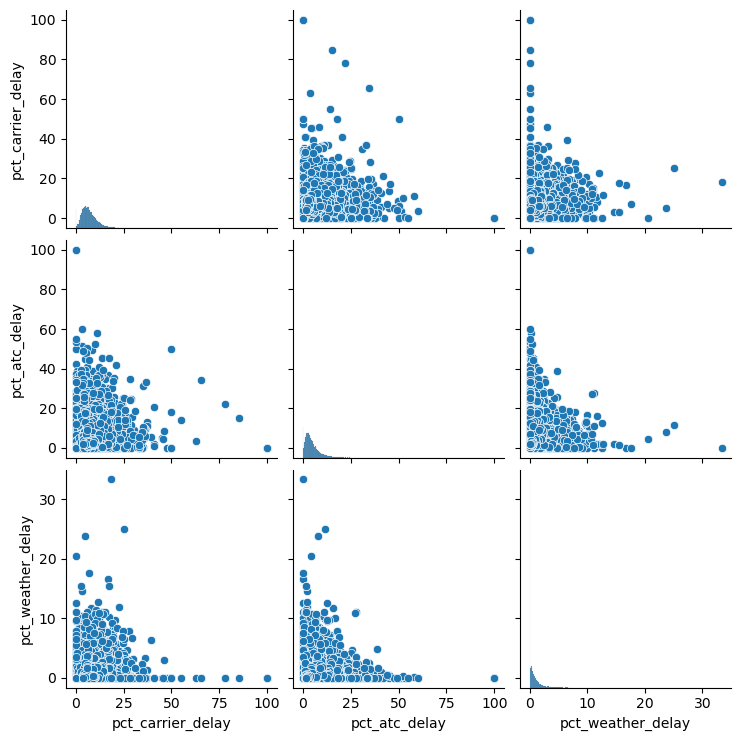

In [191]:
sns.pairplot(df_cleaned)

<Axes: >

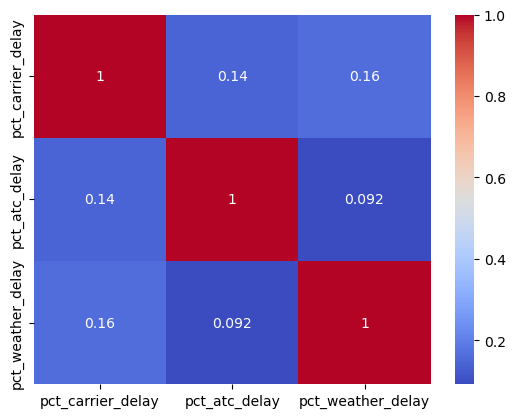

In [167]:
# 결측치가 제거된 데이터로 시각적 분석, 상관관계 분석을 수행
df_cleaned_corr_matrix = df_cleaned.corr(numeric_only = True)
sns.heatmap(data = df_cleaned_corr_matrix, annot = True,  cmap = "coolwarm")

In [175]:
#차이가 있는지 갭 분석
cor_matrix == df_cleaned_corr_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,True,True,True
pct_atc_delay,True,True,True
pct_weather_delay,True,True,True
